In [1]:
#Exemplo adaptado de https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# Redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model, decomposition, datasets

# Classificação
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Outros
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics
import sklearn as sk
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
#função que plota a variância dos dados em função dos componentes principais
def variancePCA(train, target):
    
    pca = PCA(n_components=train.shape[1])
    pca.fit(train)
        
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(np.cumsum(pca.explained_variance_), linewidth=2)
    
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')
    

In [3]:
#função que plota os dados em função da transformação realizada pelo PCA - 2D
def analyzeFeaturesPCA(train, target):
    
    pca = PCA(n_components=2)
    pca.fit(train)
    transform = pca.transform(train)

    figure(figsize(6,5))
    plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
    plt.colorbar()
    clim(0,9)
      

In [4]:
#função que plota os dados em função da transformação realizada pelo LDA - 2D
def analyzeFeaturesLDA(train, target):
    
    # Taking in as second argument the Target as labels
    lda = LDA(n_components=2)
    transform = lda.fit_transform(train, target)
    
    figure(figsize(6,5))
    plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
    plt.colorbar()
    clim(0,9) 
    

In [5]:
#mostra a acurácia para cada classificador
def plot_acc(evaluation, classif):
    
    print('-->>Acurácia')
    for cl in range(0,len(classif)):
        print(classif[cl].__class__.__name__ + ': %0.2f' % evaluation[0][cl])              
            

In [6]:
#mostra os resultados considerando a validação cruzada para cada classificador
def plot_scores(evaluation, classif):
    
    print('\n-->>Scores - Cross Validation')
    for cl in range(0,len(classif)):
        print(classif[cl].__class__.__name__ + ': %0.2f' % evaluation[1][cl])              
            

In [7]:
#roda cada classificador nos dados originais e armazena acurácia (simples e para validação cruzada k=5)
def run_classifiers(X_train, X_test, y_train, y_test, classifiers):    
    acc=[]
    cvMean=[]
        
    for clf in classifiers:       
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        acc.append(clf.score(X_test, y_test))        
        cvMean.append(cross_val_score(clf, X_train, y_train, cv=5).mean())        
                
    fullDesc = [acc, cvMean]               
    
    return fullDesc


In [8]:
#roda cada classificador nos dados transformados e armazena acurácia (simples e para validação cruzada k=5)
def run_classifiersPCA(aux, labels, classifiers, nc):        
    
    acc=[]
    cvMean=[]
        
    for idx, clf in enumerate(classifiers):       

        pca= PCA(n_components=nc[idx])
        pca.fit(aux)
        X_pca = pca.transform(aux)
        (X_train, X_test, y_train, y_test) = train_test_split(X_pca, labels, test_size=0.25, random_state=0)
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        acc.append(clf.score(X_test, y_test))        
        cvMean.append(cross_val_score(clf, X_train, y_train, cv=5).mean()) 
               
    fullDesc = [acc, cvMean]               
    
    return fullDesc


In [9]:
#roda cada classificador e armazena o numero de componentes que obteve o melhor score
def evaluate_classifierPCA(data, target, clf, split_ratio, show):    
    
    bestNC = []
    for clf in classifiers: 
        
        n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
            
        score_array = np.zeros(len(n_components_array))
        i=0
            
        for n_components in n_components_array:
            pca = PCA(n_components=n_components)
            pca.fit(data)
            transform = pca.transform(data)
            trainX, testX, trainY, testY = train_test_split(transform, target, train_size=split_ratio, random_state=0)
            clf.fit(trainX, trainY)
    
            score_array[i] = clf.score(testX,testY)
            i=i+1
        
        bestNC.append(n_components_array[score_array.argmax(axis=0)])        
        
        if show==1:           
            figure(figsize(8,4))
            plot(n_components_array,score_array,'k.-')
            xscale('log')
            title('Classificador:' + clf.__class__.__name__, size=15)
            xlabel("Número de componentes PCA", size=12)
            ylabel("Acurácia", size=12)
            grid(which="both")   
        
    return bestNC

In [10]:
#roda cada classificador e retorna o score
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

Populating the interactive namespace from numpy and matplotlib
------------------------------
Dados Originais
------------------------------
-->>Acurácia
KNeighborsClassifier: 0.66
DecisionTreeClassifier: 0.57
GaussianNB: 0.70
LinearDiscriminantAnalysis: 0.42

------------------------------
PCA
------------------------------
-->>Acurácia
KNeighborsClassifier: 0.78
DecisionTreeClassifier: 0.63
GaussianNB: 0.72
LinearDiscriminantAnalysis: 0.75


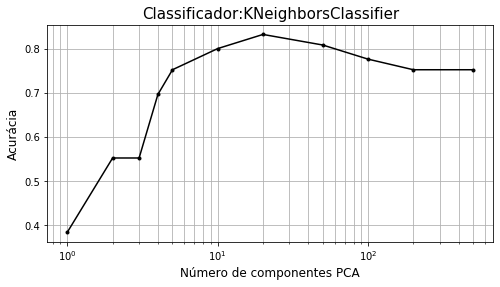

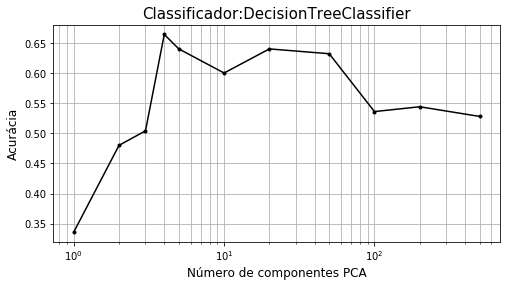

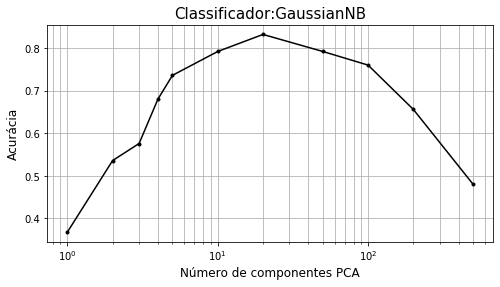

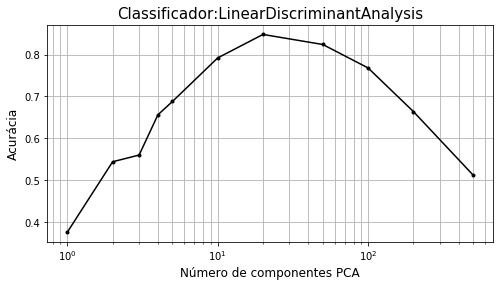

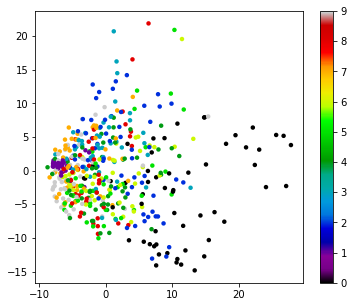

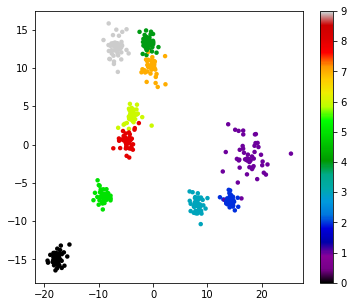

In [11]:
%pylab inline

show = 1; # se mostra os gráficos (1) ou não (0)
nrSamples = 500 # número de amostras

train_all = pd.read_csv('train.csv') #dados de treinamento

#Seleciona um número menor de amostras (facilitar processamento e visualização)
train = train_all.drop("label",axis=1)[:nrSamples].values
labels = train_all['label']
labels = labels[:nrSamples]
aux = train_all.drop("label",axis=1)    
aux = aux[0:nrSamples]

#Padroniza os dados de entrada
X_std = StandardScaler().fit_transform(train)
#X_std = train #testar e ver o impacto da normalização dos dados

# Classificadores. Observe que nenhum deles é otimizado!
classifiers = [KNeighborsClassifier(n_neighbors=13), 
               DecisionTreeClassifier(), 
               GaussianNB(),                
               LDA(n_components=100)
              ]
 
# Classificação com os dados originais
print('-' * 30 + '\nDados Originais\n' + '-' * 30 )
(X_train, X_test, y_train, y_test) = train_test_split(
        X_std, labels, test_size=0.25)
evaluation1 = run_classifiers(X_train, X_test, y_train, y_test, classifiers)
plot_acc(evaluation1, classifiers)
#plot_scores(evaluation1, classifiers) #validação cruzada

# Classificação com os dados transformados pelo PCA
print('\n' + '-' * 30 + '\nPCA\n' + '-' * 30 )
nc = evaluate_classifierPCA(aux, labels, classifiers, 0.75, show)
evaluation3 = run_classifiersPCA(X_std, labels, classifiers, nc)
plot_acc(evaluation3, classifiers)
#plot_scores(evaluation3, classifiers) #validação cruzada
    
#Visualização dos dados
if show==1:        
    analyzeFeaturesPCA(X_std, labels) # visualiza dados transformados pelo PCA   
    analyzeFeaturesLDA(X_std, labels) # visualiza dados transformados pelo LDA
